In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datasets import Dataset, DatasetDict, load_dataset
from sklearn.metrics import accuracy_score

## Alpaca label distribution

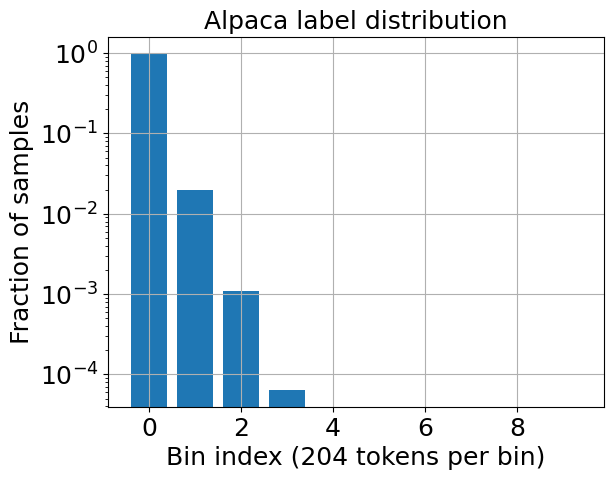

In [7]:
dataset_dict = DatasetDict.load_from_disk('dataset/alpaca_processed')
dataset_tr = dataset_dict['train']
labels = np.array(dataset_tr['label'])

bins = list(range(10))
binsizes = [np.sum(labels == x) / len(labels) for x in bins]

fig, ax = plt.subplots()
ax.bar(bins, binsizes)

# plt.legend(loc='upper right', prop={'size': 16}, edgecolor='k')
plt.title('Alpaca label distribution', fontsize=18)
plt.xlabel('Bin index (204 tokens per bin)', fontsize=18)
plt.ylabel('Fraction of samples', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
# plt.xlim(left=0, right=1)
# plt.ylim(bottom=0.5, top=0.75)
plt.yscale('log')
plt.grid()

plt.show()

## Google-QA label distribution

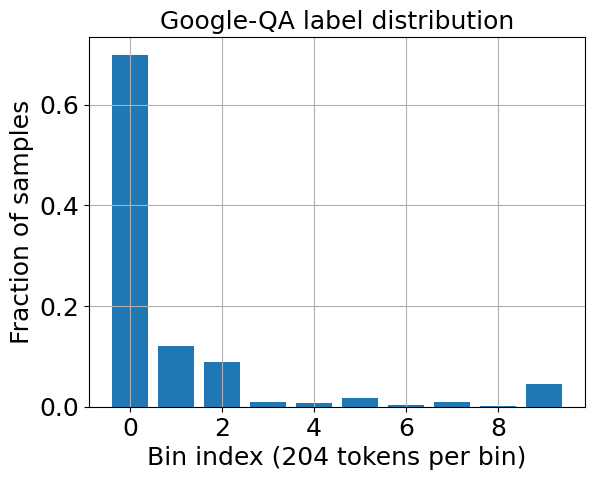

In [8]:
dataset_dict = DatasetDict.load_from_disk('dataset/google-qa_processed')
dataset_tr = dataset_dict['train']
labels = np.array(dataset_tr['label'])

bins = list(range(10))
binsizes = [np.sum(labels == x) / len(labels) for x in bins]

fig, ax = plt.subplots()
ax.bar(bins, binsizes)

# plt.legend(loc='upper right', prop={'size': 16}, edgecolor='k')
plt.title('Google-QA label distribution', fontsize=18)
plt.xlabel('Bin index (204 tokens per bin)', fontsize=18)
plt.ylabel('Fraction of samples', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
# plt.xlim(left=0, right=1)
# plt.ylim(bottom=0.5, top=0.75)
# plt.yscale('log')
plt.grid()

plt.show()

## Google-QA DistilBERT prediction evaluation

In [11]:
with open("eval/google-qa_test_eval.json", "r") as fin:
    gg_eval = json.load(fin)

y_true = np.array([x['label'] for x in gg_eval])
y_pred = np.array([x['pred_label'] for x in gg_eval])

print('Overall accuracy {:.3f}'.format(accuracy_score(y_true, y_pred)))

Overall accuracy 0.723


In [16]:
def draw_class_pred_hist(y_true, y_pred, label):
    bins = list(range(10))
    sub_pred = y_pred[y_true == label]
    binsizes = [np.sum(sub_pred == x) / len(sub_pred) for x in bins]

    fig, ax = plt.subplots()
    ax.bar(bins, binsizes)

    # plt.legend(loc='upper right', prop={'size': 16}, edgecolor='k')
    plt.title('Class {} accuracy: {:.3f}'.format(label, binsizes[label]), fontsize=18)
    plt.xlabel('Prediction', fontsize=18)
    plt.ylabel('Fraction of samples', fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax.xaxis.set_tick_params(labelsize=18)
    ax.yaxis.set_tick_params(labelsize=18)
    # plt.xlim(left=0, right=1)
    # plt.ylim(bottom=0.5, top=0.75)
    # plt.yscale('log')
    plt.grid()

    plt.show()

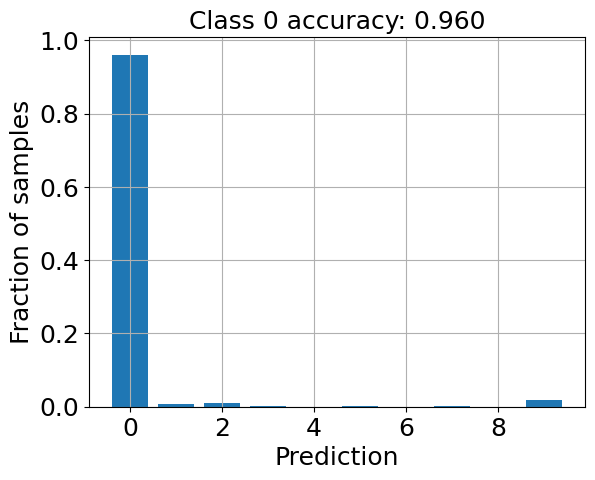

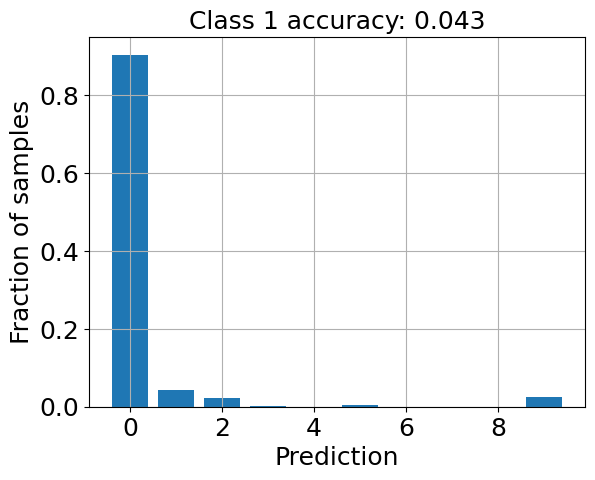

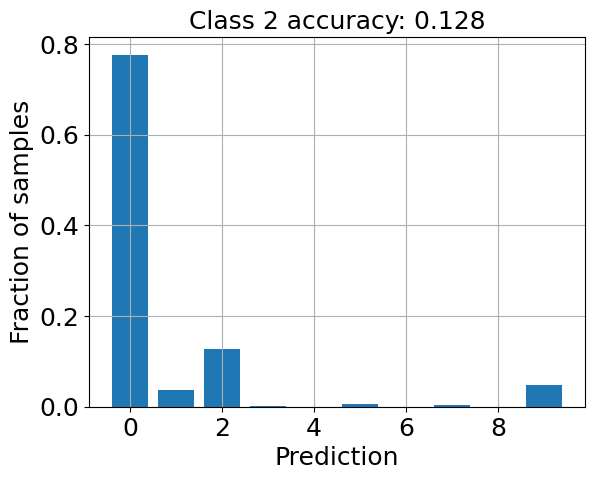

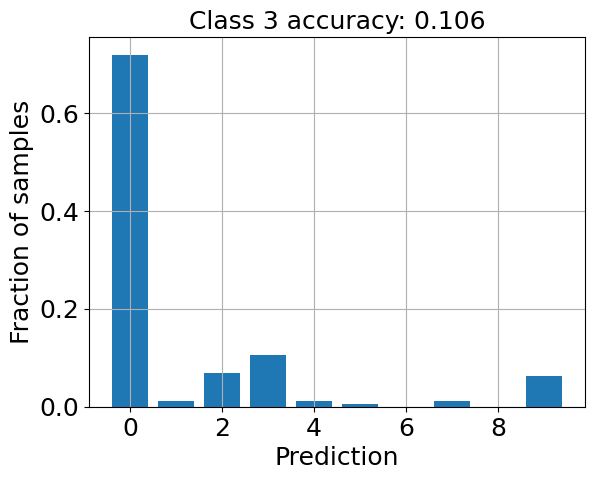

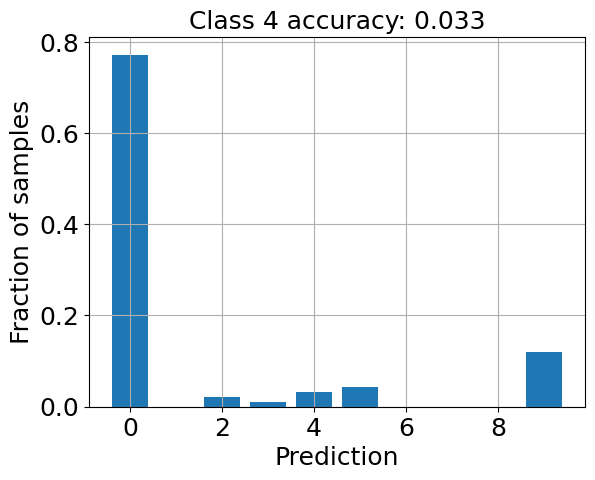

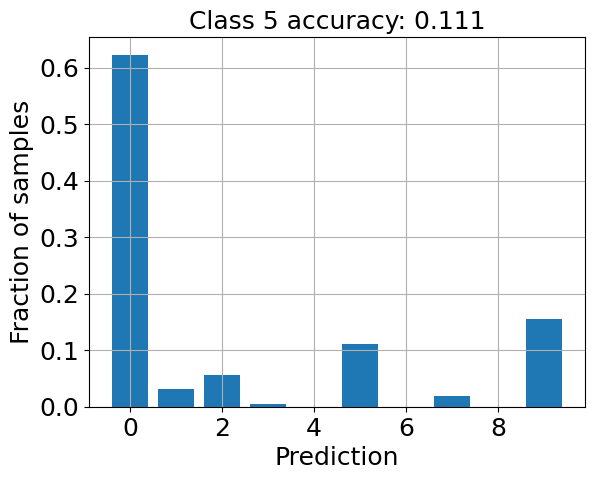

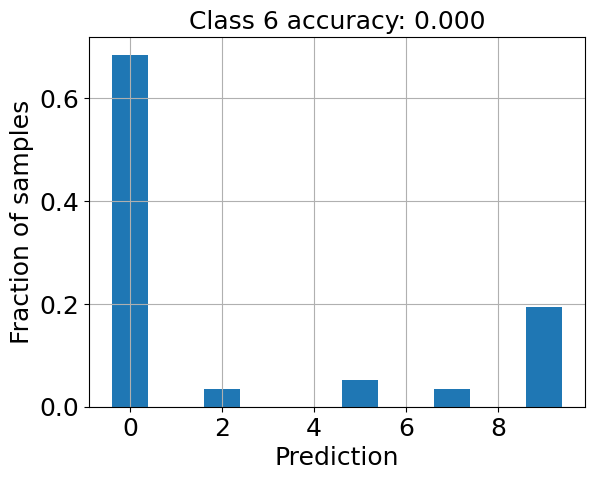

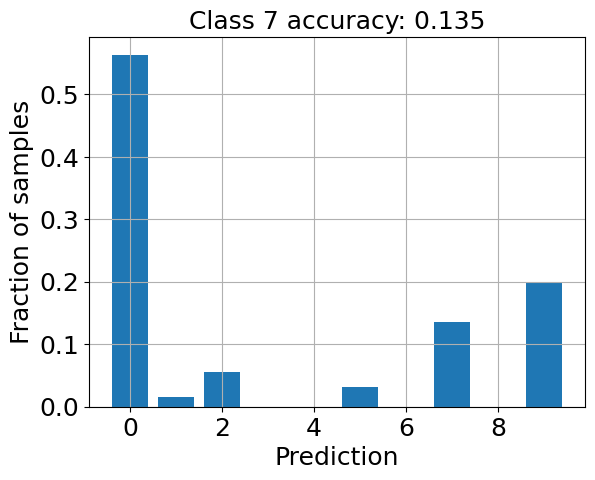

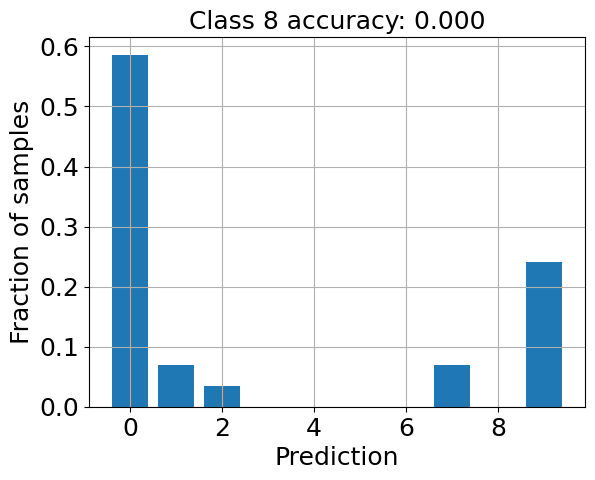

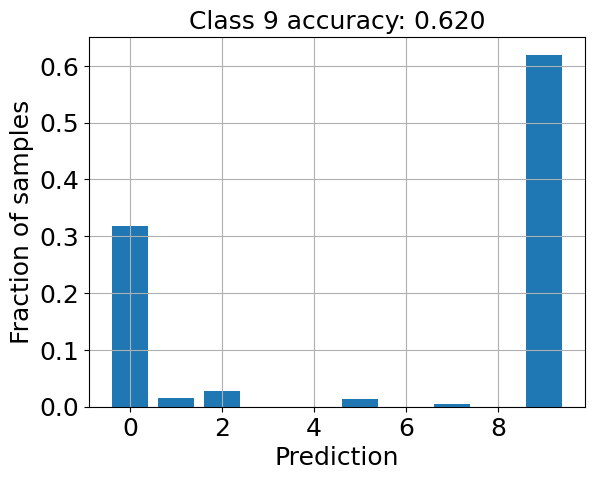

In [21]:
for label in range(10):
    draw_class_pred_hist(y_true, y_pred, label)